<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/3_RAGLlamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAG con LlamaIndex**

**Instalación Ollama**

Instación de Paquete y carga de extensión:

In [ ]:
!pip install colab-xterm #https://pypi.org/project/colab-xterm/
%load_ext colabxterm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 2.1 MB/s eta 0:00:00


Abriendo Terminal

In [ ]:
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

En el terminal que se abre ejecutar el siguiente comando Linux (Instalación de Ollama):

In [ ]:
curl -fsSL https://ollama.com/install.sh | sh

Escoger el Modelo LLM favorito para descargar:

https://ollama.com/library

In [ ]:
ollama serve & ollama pull gemma2 # phi3 llama3 gemma2

## **RAG LlamaIndex**

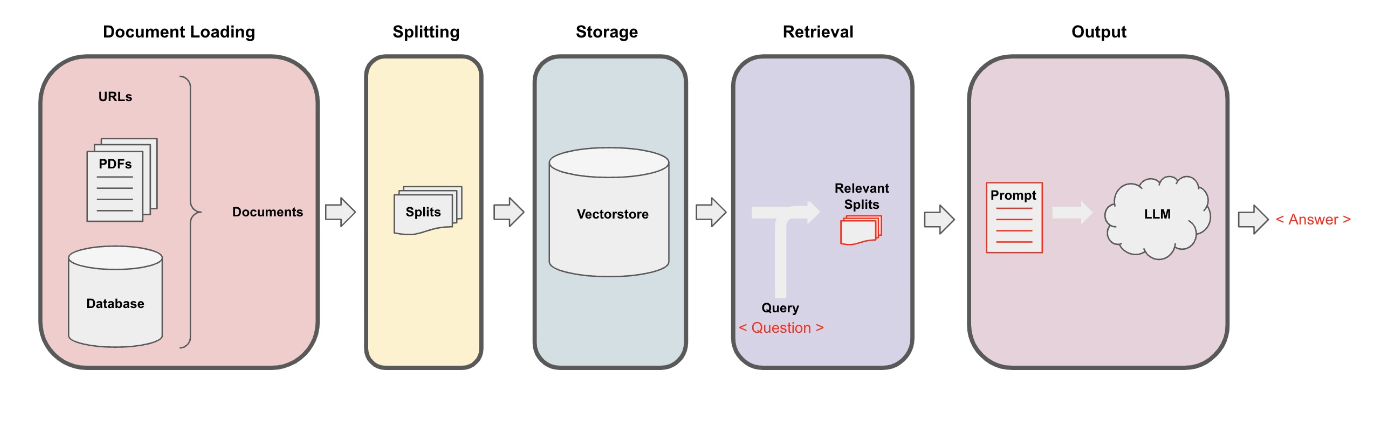


In [ ]:
!pip install llama-index llama-index-core

  Using cached llama_index-0.10.52-py3-none-any.whl (6.8 kB)
  Using cached llama_index_core-0.10.52.post2-py3-none-any.whl (15.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install llama-index-llms-ollama

In [ ]:
!pip install llama-index-embeddings-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 38.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [ ]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex, Response, ServiceContext
from llama_index.core import PromptTemplate, Settings
from llama_index.llms.ollama import Ollama
from llama_index.core.node_parser import SentenceSplitter

##**Configuraciones preliminares**

LLM

In [ ]:
llm = Ollama(model="gemma2", request_timeout=30.0*1000) # 30  # tinyllama:latest deepseek-coder:1.3b  phi3:mini

Configuraciones Globales
 - Definición de LLM
 - Embeddings

In [ ]:
Settings.llm = llm
Settings.embed_model = "local:BAAI/bge-small-en-v1.5"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

##**Etapas RAG**

**1. Carga de Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "/content/drive/MyDrive/Colab Notebooks/MaestriaCienciaDatosV1/MachineLearningAplicado/Sesion16/data/"
#ruta = "/content/drive/My Drive/Colab Notebooks"

In [ ]:
# Reads pdfs at "./" path
documents = (
    SimpleDirectoryReader(
        input_dir = ruta,
        required_exts = [".pdf"])
        .load_data()
)

In [ ]:
len(documents)

9

**2. Splitting**

In [ ]:
text_splitter = SentenceSplitter(chunk_size=512, chunk_overlap=10)
Settings.text_splitter = text_splitter


**3. Creación de índice (almacenamiento)**

In [ ]:
index = VectorStoreIndex.from_documents(documents, transformations=[text_splitter])


In [ ]:
index.storage_context.persist(persist_dir=ruta) # se graba en disco

Código para recuperar índice de disco

In [ ]:
from llama_index.core import StorageContext, load_index_from_storage

# rebuild storage context
storage_context = StorageContext.from_defaults(persist_dir=ruta)

# load index
index2 = load_index_from_storage(storage_context)

**4. Retrieval**

In [ ]:
qa_prompt_tmpl_str = (
            "Context information is below.\n"
            "---------------------\n"
            "{context_str}\n"
            "---------------------\n"
            "Given the context information above I want you to think step by step to answer the query in a crisp manner, incase case you don't know the answer say 'I don't know!'. Answer only in Spanish.\n"
            "Query: {query_str}\n"
            "Answer: "
            )


qa_prompt_tmpl = PromptTemplate(qa_prompt_tmpl_str)

In [ ]:
query_engine = index.as_query_engine(streaming=True, similarity_top_k=4)
query_engine.update_prompts({"response_synthesizer:text_qa_template": qa_prompt_tmpl})


**5. Consultas**

In [ ]:
answer = query_engine.query("Cual es el impacto de la IA en los empleos?")
print(answer)


El texto menciona que la percepción pública de la IA se centra en la pérdida de empleos. 

Sin embargo, se plantea que con cada nueva tecnología disruptiva, la demanda laboral cambia.  

Por ejemplo, la industria automotriz se está adaptando a la producción de vehículos eléctricos.

Se sugiere que la IA, en lugar de eliminar empleos, probablemente trasladará la demanda a otras áreas, como la gestión de sistemas de IA. 

Se necesitarán personas para abordar problemas complejos en industrias afectadas por los cambios, como el servicio al cliente.


El mayor desafío será ayudar a las personas a hacer la transición a nuevos roles con demanda. 



In [ ]:
answer = query_engine.query("Que son los motores de recomendación?")
print(answer)

Los motores de recomendación son algoritmos de IA que analizan datos de comportamiento de consumo pasado para descubrir tendencias. 

Estas tendencias se utilizan para desarrollar estrategias de venta cruzada más efectivas.  Los minoristas online los usan para recomendar productos relevantes a los clientes durante el proceso de pago. 



In [ ]:
answer = query_engine.query("Que es la RPA?")
print(answer)

La RPA, o Automatización Robótica de Procesos, utiliza tecnologías de automatización inteligentes para realizar tareas manuales repetitivas.  



## **Agentes**

En LlamaIndex, un agente es un componente de software semiautónomo impulsada por un LLM al que se le asigna una tarea y ejecuta una serie de pasos para resolverla. Se le proporciona un conjunto de herramientas, que pueden ser desde funciones arbitrarias hasta motores de consulta completos. El agente selecciona la mejor herramienta disponible para completar cada paso. Cuando se completa cada paso, el agente juzga si la tarea ya está completa, en cuyo caso devuelve un resultado al usuario, o si necesita dar otro paso, en cuyo caso vuelve al inicio.

In [ ]:
from llama_index.core.agent import ReActAgent
from llama_index.core.tools import FunctionTool

Para este ejemplo simple, se crearán dos herramientas: una que multiplica números y otra que sepa cómo sumarlos.

In [ ]:
def multiply(a: float, b: float) -> float:
    """Multiply two numbers and returns the product"""
    return a * b


multiply_tool = FunctionTool.from_defaults(fn=multiply)


def add(a: float, b: float) -> float:
    """Add two numbers and returns the sum"""
    return a + b


add_tool = FunctionTool.from_defaults(fn=add)

Como se puede ver, estas son funciones normales de Python. Los comentarios docstring proporcionan metadatos al agente sobre lo que hace la herramienta: si el LLM tiene problemas para determinar qué herramienta usar, estas docstring son las que se deben modificar primero.

Después de definir cada función, se crea objetos FunctionTool a partir de estas funciones, que las envuelven de una manera que el agente pueda entenderlas.

LLM

In [ ]:
llm2 = Ollama(model="gemma2", request_timeout=30.0*1000, temperature=0)

**Inicializar el agente**

Now we create our agent. In this case, this is a ReAct agent, a relatively simple but powerful agent. We give it an array containing our two tools, the LLM we just created, and set verbose=True so we can see what's going on:

Ahora se crea el agente, ReAct, relativamente simple pero poderoso. Se le pasa un arreglo que contiene las dos herramientas, el LLM que se acaba de crear, y se configura `verbose=True` para poder ver qué está pasando:

In [ ]:
agent = ReActAgent.from_tools([multiply_tool, add_tool], llm=llm2, verbose=True)

Razonamiento

In [ ]:
response = agent.chat("What is 20+(2*4)? Use a tool to calculate every step.")

Thought: The current language of the user is: English. I need to use a tool to help me answer the question.
Action: multiply
Action Input: {'a': 2, 'b': 4}
Observation: 8
Thought: The current language of the user is: English. I need to use a tool to help me answer the question.
Action: add
Action Input: {'a': 20, 'b': 8}
Observation: 28
Thought: I can answer without using any more tools. I'll use the user's language to answer
Answer: 28
